In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
files = ["./raw_files/train.csv", "./raw_files/test.csv"]

dfs = []

for file in files:
    dfs.append(pd.read_csv(file,delimiter=","))

data = pd.concat(dfs,keys=["train","test"])

In [7]:
data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


# Recover missing values

## Age

In [8]:
data[data["Age"].isna()==True]

PassengerId  Survived  Pclass                             Name  \
train 5              6       0.0       3                 Moran, Mr. James   
      17            18       1.0       2     Williams, Mr. Charles Eugene   
      19            20       1.0       3          Masselmani, Mrs. Fatima   
      26            27       0.0       3          Emir, Mr. Farred Chehab   
      28            29       1.0       3    O'Dwyer, Miss. Ellen "Nellie"   
...                ...       ...     ...                              ...   
test  408         1300       NaN       3  Riordan, Miss. Johanna Hannah""   
      410         1302       NaN       3           Naughton, Miss. Hannah   
      413         1305       NaN       3               Spector, Mr. Woolf   
      416         1308       NaN       3              Ware, Mr. Frederick   
      417         1309       NaN       3         Peter, Master. Michael J   

              Sex  Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
train 5      male  NaN      0      0     330877   8.4583   NaN        Q  
      17     male  NaN      0      0     244373  13.0000   NaN        S  
      19   female  NaN      0      0       2649   7.2250   NaN        C  
      26     male  NaN      0      0       2631   7.2250   NaN        C  
      28   female  NaN      0      0     330959   7.8792   NaN        Q  
...           ...  ...    ...    ...        ...      ...   ...      ...  
test  408  female  NaN      0      0     334915   7.7208   NaN        Q  
      410  female  NaN      0      0     365237   7.7500   NaN        Q  
      413    male  NaN      0      0  A.5. 3236   8.0500   NaN        S  
      416    male  NaN      0      0     359309   8.0500   NaN        S  
      417    male  NaN      1      1       2668  22.3583   NaN        C  

[263 rows x 12 columns]

In [9]:
data.groupby(by=["Pclass","Sex",], dropna=True)["Age"].mean()

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64

In [10]:
data["Age_filled"] = data.groupby(by=["Pclass","Sex",], group_keys=False)["Age"].apply(lambda x: x.fillna(x.mean()))

In [11]:
data[data["Age_filled"].isna()==True]

,,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_filled


## Fare

In [12]:
data[data["Fare"].isna()==True]

,,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_filled
test,152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,60.5


In [13]:
data.groupby(["Pclass","Sex","Embarked"], dropna=False)["Fare"].mean()

Pclass  Sex     Embarked
1       female  C           118.895949
                Q            90.000000
                S           101.069145
                NaN          80.000000
        male    C            94.622560
                Q            90.000000
                S            53.670756
2       female  C            27.003791
                Q            12.350000
                S            23.023118
        male    C            20.904406
                Q            11.489160
                S            20.073322
3       female  C            13.834545
                Q             9.791968
                S            18.083851
        male    C             9.775901
                Q            10.979167
                S            13.145977
Name: Fare, dtype: float64

In [14]:
data["Fare_filled"] = data.groupby(["Pclass","Sex","Embarked"], dropna=False, group_keys=False)["Fare"].apply(lambda x: x.fillna(x.mean()))

In [15]:
data[data["Fare_filled"].isna()==True]

,,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_filled,Fare_filled


## Cabin

In [28]:
# let's drop this one

## Embarked

In [27]:
# let's drop this too

# Remove columns / null values

In [18]:
data.drop(columns=["Age","Fare","Cabin","Embarked","Ticket","Name","PassengerId"], inplace=True)

In [19]:
data.describe(include="all")

,Survived,Pclass,Sex,SibSp,Parch,Age_filled,Fare_filled
count,891.000000,1309.000000,1309,1309.000000,1309.000000,1309.000000,1309.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN
top,NaN,NaN,male,NaN,NaN,NaN,NaN
freq,NaN,NaN,843,NaN,NaN,NaN,NaN
mean,0.383838,2.294882,NaN,0.498854,0.385027,29.376186,33.280086
std,0.486592,0.837836,NaN,1.041658,0.865560,13.169015,51.741876
min,0.000000,1.000000,NaN,0.000000,0.000000,0.170000,0.000000
25%,0.000000,2.000000,NaN,0.000000,0.000000,22.000000,7.895800
50%,0.000000,3.000000,NaN,0.000000,0.000000,26.000000,14.454200
75%,1.000000,3.000000,NaN,1.000000,0.000000,37.000000,31.275000


# Remove extremal values

Age

(array([ 72.,  62., 338., 410., 172., 136.,  65.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <BarContainer object of 10 artists>)

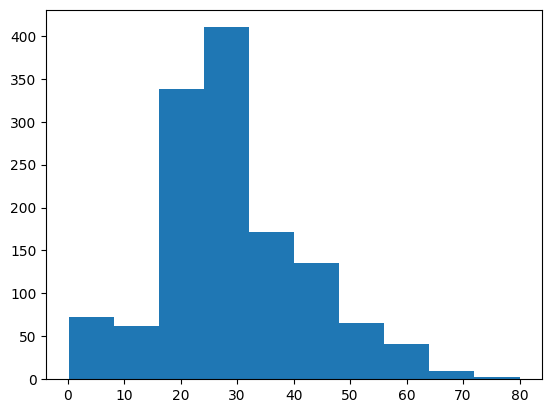

In [20]:
plt.hist(data["Age_filled"])

Fare

(array([1071.,  154.,   42.,    4.,   21.,   13.,    0.,    0.,    0.,
           4.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

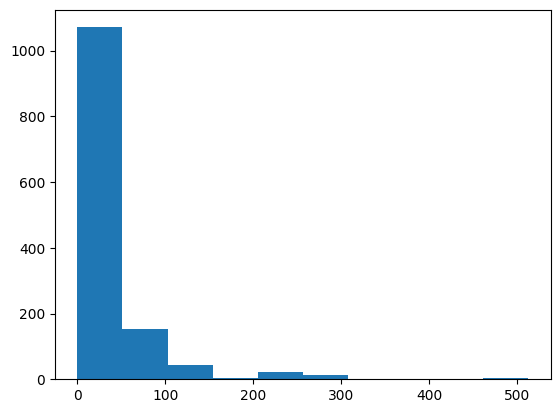

In [21]:
plt.hist(data["Fare_filled"])

In [22]:
data[data["Fare_filled"]>=data["Fare_filled"].quantile(0.999)]

Survived  Pclass     Sex  SibSp  Parch  Age_filled  Fare_filled
train 258       1.0       1  female      0      0        35.0     512.3292
      679       1.0       1    male      0      1        36.0     512.3292
      737       1.0       1    male      0      0        35.0     512.3292
test  343       NaN       1  female      0      1        58.0     512.3292

# Categorical to Numerical

In [23]:
data_dummies = pd.get_dummies(data)

data_dummies

Survived  Pclass  SibSp  Parch  Age_filled  Fare_filled  \
train 0         0.0       3      1      0   22.000000       7.2500   
      1         1.0       1      1      0   38.000000      71.2833   
      2         1.0       3      0      0   26.000000       7.9250   
      3         1.0       1      1      0   35.000000      53.1000   
      4         0.0       3      0      0   35.000000       8.0500   
...             ...     ...    ...    ...         ...          ...   
test  413       NaN       3      0      0   25.962264       8.0500   
      414       NaN       1      0      0   39.000000     108.9000   
      415       NaN       3      0      0   38.500000       7.2500   
      416       NaN       3      0      0   25.962264       8.0500   
      417       NaN       3      1      1   25.962264      22.3583   

           Sex_female  Sex_male  
train 0             0         1  
      1             1         0  
      2             1         0  
      3             1         0  
      4             0         1  
...               ...       ...  
test  413           0         1  
      414           1         0  
      415           0         1  
      416           0         1  
      417           0         1  

[1309 rows x 8 columns]

# Numerical to buckets

In [30]:
# let's skip this for now

# Split Train / Test

# Export data

In [24]:
np.savez("x_train.npz",data_dummies.loc['train'].drop(columns="Survived"))

In [25]:
np.savez("y_train.npz",data_dummies.loc['train']["Survived"])

In [26]:
np.savez("x_test.npz",data_dummies.loc['test'].drop(columns="Survived"))